# Check Types and Sizes

In [1]:
# Import modules
import cv2

In [11]:
# Load image
image_path = './data/cat.png'
image = cv2.imread(image_path)

# Check types and size
image_type = type(image)
image_height, image_width, image_channel = image.shape

print('Types of Image: ', image_type)
print('Size of Image: ', image_height, image_width, image_channel)

Types of Image:  <class 'numpy.ndarray'>
Size of Image:  162 310 3


# 2. Check Images

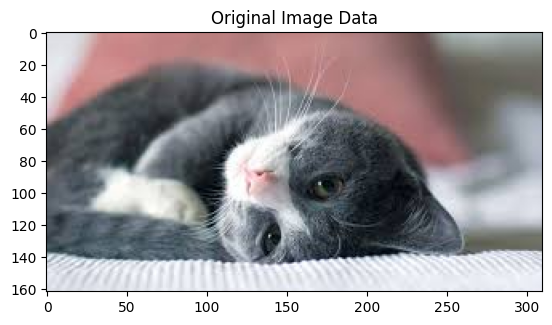

In [13]:
# Import modules
import cv2
import matplotlib.pyplot as plt

# Set a path
image_path = './data/cat.png'
#image_path

# Load images
image = cv2.imread(image_path)

# Converg BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show images
plt.imshow(image)
plt.title('Original Image Data')
plt.show()

# 3. Change Image Size

The Size of Images:  224 224


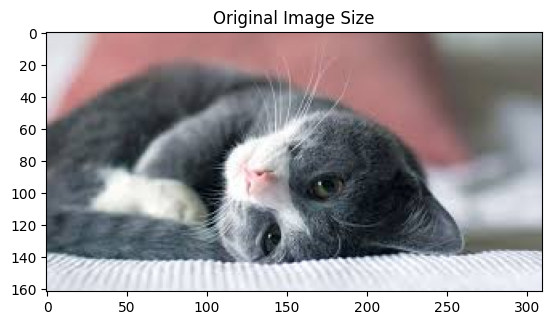

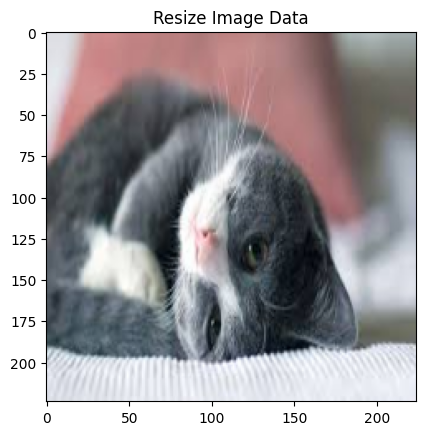

In [17]:
# Import modules
import cv2
import matplotlib.pyplot as plt

# Set a path
image_path = './data/cat.png'
#image_path

# Converg BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Change Size of Image
image_resize = cv2.resize(image, (224, 224))
#image_resize

# Check size of images
image_height, image_width, image_channel = image_resize.shape
print('The Size of Images: ', image_height, image_width)

# Visualization: Original image
plt.imshow(image)
plt.title('Original Image Size')
plt.show()

# Visualization: Cropped Image
plt.imshow(image_resize)
plt.title('Resize Image Data')
plt.show()



# 4. Crop Images

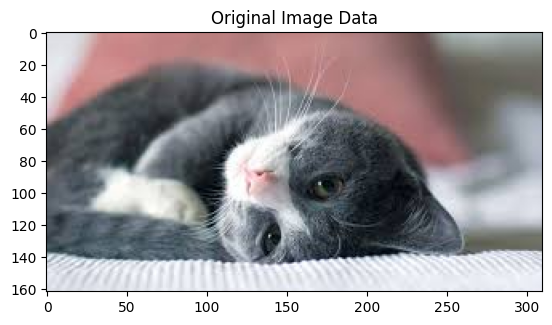

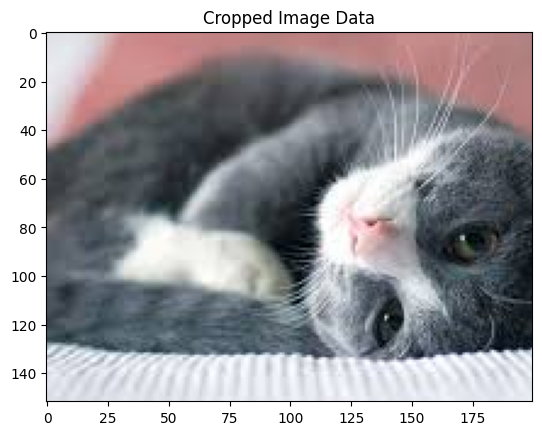

In [34]:
# Import modules
import cv2
import matplotlib.pyplot as plt

# Load images
image_path = './data/cat.png'
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Crop images
image_cropped = image[10:, :200]  # [start : end : step]

# Visualization
plt.imshow(image)
plt.title('Original Image Data')
plt.show()

plt.imshow(image_cropped)
plt.title('Cropped Image Data')
plt.show()

In [18]:
# p 131-

In [19]:
# - p142

# ?. Remove Backgrounds

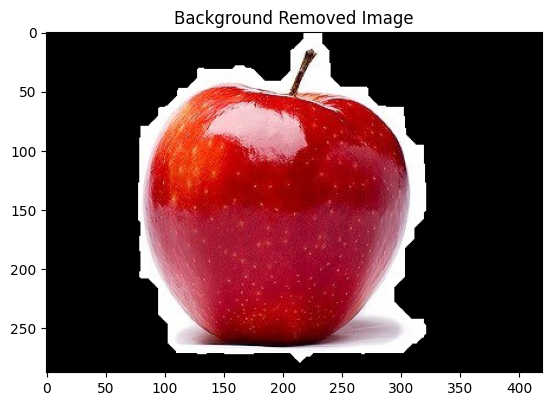

In [31]:
# Import modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load images
image_path = './data/apple.png'
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set rectangle axises
rectangle = (0, 0, 399, 1000)  # (x, y, weight, height)

# Create an initial mask
mask = np.zeros(image.shape[:2], np.uint8)

# Create temp arrays for 'grabCut'
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run 'grabCut'
cv2.grabCut(image,
           mask,
           rectangle,
           bgdModel,
           fgdModel,
           5,
           cv2.GC_INIT_WITH_RECT)

# ?
mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Remove backgrounds
image_rgb_nobg = image * mask2[:, :, np.newaxis]

# Visualization
plt.imshow(image_rgb_nobg)
plt.title('Background Removed Image')
plt.show()

# ?. Detect Image Border Line: `Canny()`

Median Intensity:  255.0 

Lower Threshold:  170
Upper Threshold:  255 



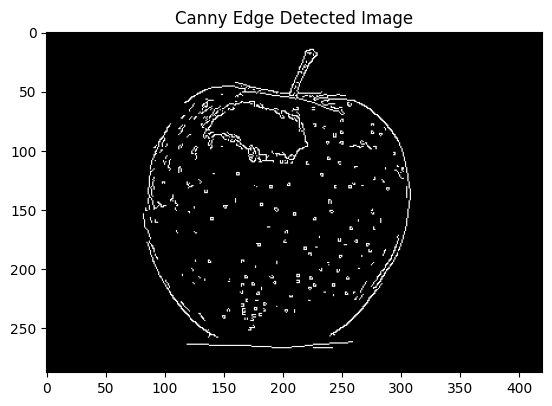

In [43]:
# Import modules
import cv2
import matplotlib.pyplot as plt

# Load images
image_path = './data/apple.png'
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate a median value of pixel intensity
median_intensity = np.median(image_gray)
print('Median Intensity: ', median_intensity, '\n')

# Set Thresholds: Lower and Upper Threshold
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))
print('Lower Threshold: ', lower_threshold)
print('Upper Threshold: ', upper_threshold, '\n')

# Run Canny Edge Detection
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
#image_canny

# Visualization
plt.imshow(image_canny, 'gray')
plt.title('Canny Edge Detected Image')
plt.show()

In [36]:
# 2. 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임계값으로 지정
lower_threshold = int(max(0, (1.0 - 0.44) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 0과의 최댓값을 취합니다. 이렇게 함으로써 중간 강도의 44% 아래 값을 하한값으로 설정합니다. 
# 하한값은 0 미만으로 설정되지 않도록 하기 위한 것입니다.
upper_threshold = int(min(255, (1.0 + 0.44) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 255과의 최소값을 취합니다. 이렇게 함으로써 중간 강도의 44% 아래 값을 상한값으로 설정합니다. 
# 상한값은 255 초과 x

# ?. Detect Conners: `connerHarris()`

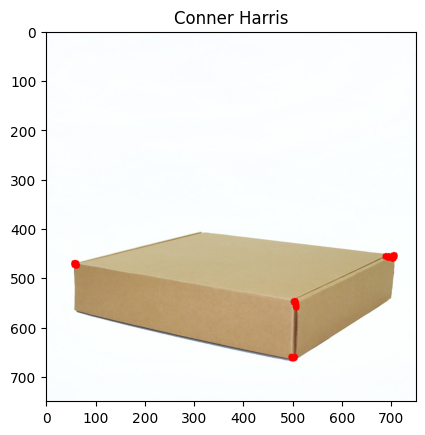

In [56]:
# Import modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load images
image_path = './data/box.png'
image = cv2.imread(image_path)
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
##image_gray

# Convert to 32-bit floating-point numbers
image_gray = np.float32(image_gray)
##image_gray

# Set parrameters
block_size = 4  # Number of conners
aperture = 29   # Size of window and mask used for corner detection
free_parameter = 0.04

# Detet conners
detector_responses = cv2.cornerHarris(image_gray,
                                     block_size,
                                     aperture,
                                     free_parameter)
detector_responses = cv2.dilate(detector_responses, None)
##detector_responses

# Mark in Red, leaving only results grater than threshold
threshold = 0.01
for i in range(detector_responses.shape[0]):
    for j in range(detector_responses.shape[1]):
        if detector_responses[i, j] > threshold * detector_responses.max():
            #print(threshold * detector_responses.max())
            cv2.circle(image, (j, i), radius=5, color=(0, 0, 255), thickness=-1)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualization
plt.imshow(image)
plt.title('Conner Harris')
plt.show()

i는 행 인덱스를, j는 열 인덱스를 의미합니다.

 

따라서, cv2.circle 함수에 전달되는 중심 좌표 [j, i]는 열 좌표 j가 x축을, 행 좌표 i가 y축을 나타내는 이미지 좌표 시스템에서의 좌표입니다. 이렇게 좌표를 [j, i]로 설정함으로써 이미지 상에서 각 점에 대해 원을 그릴 수 있습니다.

In [ ]:
# -150